In [1]:
from fastai.vision import *

# Get the URLS & Data

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));


In [14]:
ls

data/  README.md  Untitled.ipynb


In [38]:
# If there are multiple files, you will have to run each cell once, then uncomment the next csv and rerun

In [285]:
folder = "PSU"
# files = 'data/URLS/PSU/corsair_powersupply.csv'
files = 'data/URLS/PSU/power_supply.csv'
# files = 'data/URLS/PSU/seasonic.csv'
# files = 'data/URLS/PSU/evga_psu.csv'

In [216]:
folder = "CPU"
files = 'data/URLS/CPU/amd.csv'
# files = 'data/URLS/CPU/intel.csv'
# files = 'data/URLS/CPU/cpu.csv'
# files = 'data/URLS/CPU/qualcomm_cpu.csv'

In [232]:
folder = "GPU"
files = 'data/URLS/GPU/gpu.csv'
# files = 'data/URLS/GPU/amd_gpu.csv'
# files = 'data/URLS/GPU/intel_gpu.csv'
# files = 'data/URLS/GPU/nvidia_gpu.csv'

In [283]:
folder = "RAM"
files = 'data/URLS/RAM/random_access_memory.csv'
# files = 'data/URLS/RAM/computer_ram.csv'
# files = 'data/URLS/RAM/corsair_ram.csv'
# files = 'data/URLS/RAM/gskill_ram.csv'

In [260]:
folder = 'MOBO'
files = 'data/URLS/MOBO/computer_mobo.csv'
# files = 'data/URLS/MOBO/evga_mobo.csv'
# files = 'data/URLS/MOBO/asus_mobo.csv'
# files = 'data/URLS/MOBO/msi_mobo.csv'

In [273]:
folder = 'MOUSE'
files = 'data/URLS/MOUSE/computer_mouse.csv'
# files = 'data/URLS/MOUSE/corsair_mouse.csv'
# files = 'data/URLS/MOUSE/razer_mouse.csv'
# files = 'data/URLS/MOUSE/logi_mouse.csv'

In [248]:
folder = "KEYB"
files = 'data/URLS/KEYB/office_keyboard.csv'
# files = 'data/URLS/KEYB/corsair_keyboard.csv'
# files = 'data/URLS/KEYB/reddit_keyboards.csv'
# files = 'data/URLS/KEYB/logi_keyboards.csv'

In [286]:
path = Path('data/Parts')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [287]:
path.ls()

[PosixPath('data/Parts/MOUSE'),
 PosixPath('data/Parts/CPU'),
 PosixPath('data/Parts/RAM'),
 PosixPath('data/Parts/KEYB'),
 PosixPath('data/Parts/GPU'),
 PosixPath('data/Parts/PSU'),
 PosixPath('data/Parts/MOBO')]

In [288]:
download_images(files, dest, max_pics=500)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

# Play With Data / Clean

In [289]:
classes = ['CPU', 'GPU', 'KEYB', 'MOBO', 'MOUSE', 'PSU', 'RAM']

In [290]:
# Remove images that can't be opened
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=1000)

CPU


GPU


KEYB


MOBO


MOUSE


PSU


RAM


In [291]:
# Set that random seed yo!
np.random.seed(42)

In [14]:
data = ImageDataBunch.from_folder('data/Parts', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [15]:
data.classes

['CPU', 'GPU', 'KEYB', 'MOBO', 'MOUSE', 'PSU', 'RAM']

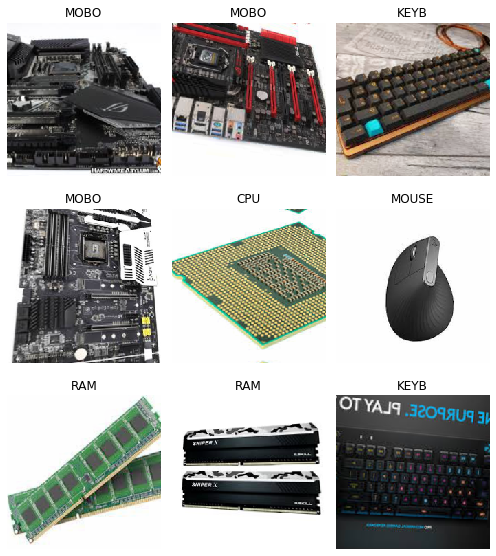

In [16]:
data.show_batch(rows=3, figsize=(7,8))

In [297]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['CPU', 'GPU', 'KEYB', 'MOBO', 'MOUSE', 'PSU', 'RAM'], 7, 2341, 585)

# Train The Model

In [17]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [299]:
learn.fit_one_cycle(9)

epoch,train_loss,valid_loss,error_rate,time
0,0.991288,0.347785,0.094017,03:40
1,0.608944,0.403941,0.094017,03:24
2,0.459737,0.336878,0.088889,03:27
3,0.358306,0.303514,0.088889,03:32
4,0.269041,0.272576,0.080342,03:10
5,0.216135,0.266735,0.082051,03:10
6,0.174155,0.267728,0.082051,03:10
7,0.128224,0.275435,0.083761,03:10
8,0.119659,0.271953,0.083761,03:11


In [300]:
learn.save('stage-1')

In [301]:
learn.unfreeze()

In [302]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


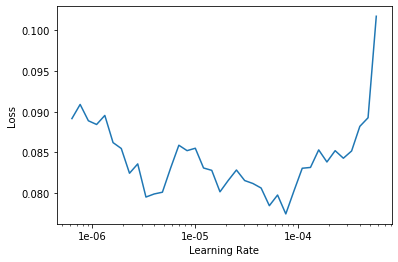

In [303]:
learn.recorder.plot()

In [305]:
help(learn.fit_one_cycle)

Help on method fit_one_cycle in module fastai.train:

fit_one_cycle(cyc_len: int, max_lr: Union[float, Collection[float], slice] = slice(None, 0.003, None), moms: Tuple[float, float] = (0.95, 0.85), div_factor: float = 25.0, pct_start: float = 0.3, final_div: float = None, wd: float = None, callbacks: Union[Collection[fastai.callback.Callback], NoneType] = None, tot_epochs: int = None, start_epoch: int = None) -> None method of fastai.basic_train.Learner instance
    Fit a model following the 1cycle policy.



In [307]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.091344,0.269082,0.082051,05:32
1,0.094149,0.264726,0.082051,05:19


In [308]:
learn.save('stage-2')

# Interpretation

In [309]:
learn.load('stage-2');

In [310]:
interp = ClassificationInterpretation.from_learner(learn)

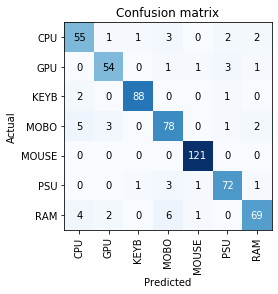

In [311]:
interp.plot_confusion_matrix()

# Cleaning Up

In [2]:
from fastai.widgets import *

In [4]:
path = Path('data/Parts')

In [5]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [7]:
learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)

learn_cln.load('stage-2');

In [9]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [10]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

# Getting Ready For Production

In [19]:
learn.load('stage-2');

In [20]:
learn.export()

In [21]:
defaults.device = torch.device('cpu')

In [22]:
ls

data/  keyboard.jpg  model.ipynb  mouse.jpg  Parts/  README.md


# Make predictions on my PC Parts

In [26]:
learn_prod = load_learner(path)

In [35]:
mouse = open_image('mouse.jpg')
keyboard = open_image('keyboard.jpg')
ram = open_image('ram.jpg')
gpu = open_image('gpu.jpg')

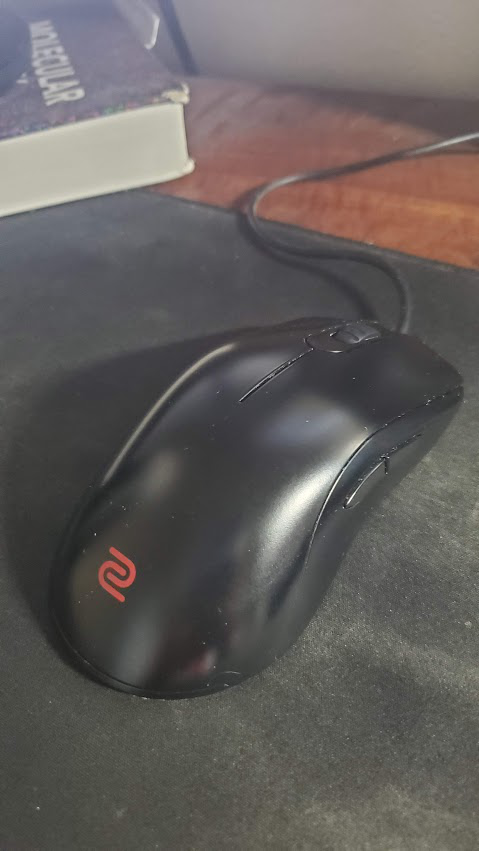

In [41]:
mouse

In [42]:
pred_class, pred_idx, outputs = learn.predict(mouse)
print(pred_class)

MOUSE


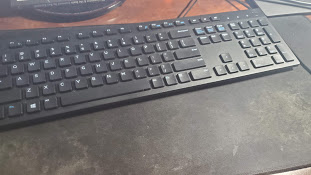

In [31]:
keyboard

In [43]:
pred_class, pred_idx, outputs = learn.predict(keyboard)
print(pred_class)

KEYB


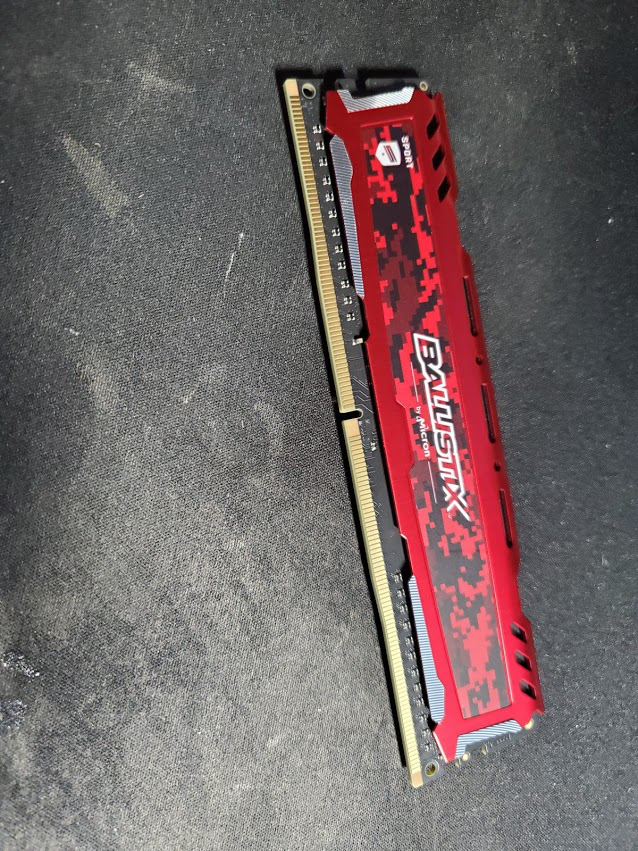

In [36]:
ram

In [44]:
pred_class, pred_idx, outputs = learn.predict(ram)
print(pred_class)

RAM


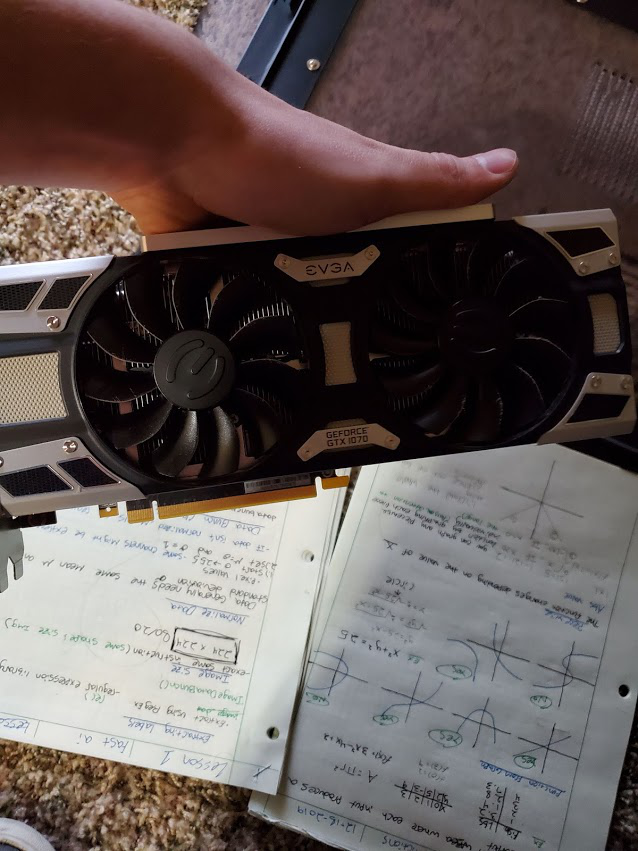

In [37]:
gpu

In [45]:
pred_class, pred_idx, outputs = learn.predict(gpu)
print(pred_class)

GPU
